In [1]:
import pandas as pd
import os
import glob
import datetime
import matplotlib.pyplot as plt

## combining all pbp csv files 

In [ ]:
# os.chdir("/Users/victortu/Desktop/Python Projects/DameTime/PBP csv files (newest)")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("combined_pbp_csv(BAD).csv", index=False, encoding='utf-8-sig')

## reading combined csv files

In [2]:
df = pd.read_csv("/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/combined_pbp_csv.csv")

## filtering original csv for necessary player data 

In [4]:
def playerfilter(df, team, playername):
    #filter POR away/home 
    filtloc = df.loc[(df["AwayTeam"].str.contains(team)) | (df["HomeTeam"].str.contains(team))]

    #filter for the rest of the conditions 
    filtcond = filtloc.loc[(df["Quarter"] == 4) & (df["SecLeft"] <= 120) & (df["Shooter"].str.contains(playername))]

    #filter for necessary columns
    playerstats = filtcond[["Date","AwayPlay", "HomePlay", "SecLeft","Shooter","ShotOutcome","ShotType"]]
    
    #combining AwayPlay and HomePlay columns
    playerstats.columns = playerstats.columns.str.replace('.*?Play', 'Play', regex = True)

    #stack
    s = playerstats.stack() 
    s

    #unstack
    playerstats = s.unstack()

    #converting date column to a datetime format  
    playerstats['Date'] = pd.to_datetime(df['Date'])
    
    return(playerstats)

## filtering playerstats for specific seasons

In [5]:
#filtering for 2015-2016 season and generating csv file
def filter16(df, filename): 
    start_date = "10-27-2015"
    end_date = "06-19-2016"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats16 = df.loc[mask]
    
    #export playerstats16 to csv 
    name = filename    
    playerstats16.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}16.csv')
    
    return(playerstats16)

In [6]:
#filtering for 2016-2017 season
def filter17(df, filename):
    start_date = "10-25-2016"
    end_date = "06-18-2017"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats17 = df.loc[mask]
    
    #export playerstats17 to csv 
    name = filename
    playerstats17.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}17.csv')
    
    return(playerstats17)

In [7]:
#filtering for 2017-2018 season
def filter18(df, filename):
    start_date = "10-17-2017"
    end_date = "06-17-2018"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats18 = df.loc[mask]
    
    #export playerstats18 to csv 
    name = filename
    playerstats18.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}18.csv')
    
    return(playerstats18)

In [8]:
#filtering for 2018-2019 season
def filter19(df, filename):
    start_date = "10-16-2018"
    end_date = "06-10-2019"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)
    
    playerstats19 = df.loc[mask]

    #export playerstats19 to csv 
    name = filename
    playerstats19.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}19.csv')
    
    return(playerstats19)

In [9]:
#filtering for 2019-2020 season
def filter20(df,filename):
    start_date = "10-22-2019"
    end_date = "10-11-2020"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats20 = df.loc[mask]
    
    #export damestats20 to csv 
    name = filename
    playerstats20.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}20.csv')
  
    return(playerstats20)

In [10]:
#filtering for 2020-2021 season
def filter21(df, filename):
    start_date = "12-22-2020"
    end_date = "07-20-2021"

    mask = (df["Date"] > start_date) & (df["Date"] <= end_date)

    playerstats21 = df.loc[mask]
    
    # export playerstats21 to csv 
    name = filename
    playerstats21.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/'f'{name}21.csv')
   
    return(playerstats21)

## functions for analysis

In [11]:
#function for calculating 3-pt shot percentage 
def threeptcalc(df):
    
    #filters damestats to show only 3-point attempts
    dt3 = df[df.Play.str.contains("3-pt")]
    
    #number of 3-pointers attempted
    shotattempts3 = len(dt3.index)
    
    #filters dt3 to show only made attempts
    dt3made = dt3[dt3.ShotOutcome.str.contains("make")]
    
    #number of 3-pointers made
    madeshots3 = len(dt3made.index)
    
    #3-point shot make percentage 
    shotper3 = madeshots3 / shotattempts3 * 100
    
    #limits the percent to 2 decimal places 
    rshotper3 = round(shotper3, 2)
    
    return(rshotper3)

In [12]:
#function for calculating 2-pt shot percentage
def twoptcalc(df):
    
    #filters damestats to show only 2-point attempts
    dt2 = df[df.Play.str.contains("2-pt")]
    
    #number of 2-pointers attempted
    shotattempts2 = len(dt2.index)
    
    #filters dt2 to show only made attempts
    dt2made = dt2[dt2.ShotOutcome.str.contains("make")]
    
    #number of 2-pointers made
    madeshots2 = len(dt2made.index)
    
    #2-point shot make percentage
    shotper2 = madeshots2 / shotattempts2 * 100
    
    #limits the percent to 2 decimal places 
    rshotper2 = round(shotper2, 2)
    
    return(rshotper2)

In [16]:
#main function that executes all functions
def main(df):
    
    #execute playerfilter function
    damestats = playerfilter(df, "POR", "D. Lillard")
    currystats = playerfilter(df, "GSW", "S. Curry")
    bookerstats = playerfilter(df, "PHO", "D. Booker")
    
    #execute seasonfilter functions
    damestats16 = filter16(damestats, "damestats")
    damestats17 = filter17(damestats, "damestats")
    damestats18 = filter18(damestats, "damestats")
    damestats19 = filter19(damestats, "damestats")
    damestats20 = filter20(damestats, "damestats")
    damestats21 = filter21(damestats, "damestats")
    
    currystats16 = filter16(currystats, "currystats")
    currystats17 = filter17(currystats, "currystats")
    currystats18 = filter18(currystats, "currystats")
    currystats19 = filter19(currystats, "currystats")
    currystats20 = filter20(currystats, "currystats")
    currystats21 = filter21(currystats, "currystats")
    
    bookerstats16 = filter16(bookerstats, "bookerstats")
    bookerstats17 = filter17(bookerstats, "bookerstats")
    bookerstats18 = filter18(bookerstats, "bookerstats")
    bookerstats19 = filter19(bookerstats, "bookerstats")
    bookerstats20 = filter20(bookerstats, "bookerstats")
    bookerstats21 = filter21(bookerstats, "bookerstats")
                               
    #execute three point calculation
    dame316 = threeptcalc(damestats16)
    dame317 = threeptcalc(damestats17)
    dame318 = threeptcalc(damestats18)
    dame319 = threeptcalc(damestats19)
    dame320 = threeptcalc(damestats20)
    dame321 = threeptcalc(damestats21)
    
    curry316 = threeptcalc(currystats16)
    curry317 = threeptcalc(currystats17)
    curry318 = threeptcalc(currystats18)
    curry319 = threeptcalc(currystats19)
    curry320 = threeptcalc(currystats20)
    curry321 = threeptcalc(currystats21)
    
    booker316 = threeptcalc(bookerstats16)
    booker317 = threeptcalc(bookerstats17)
    booker318 = threeptcalc(bookerstats18)
    booker319 = threeptcalc(bookerstats19)
    booker320 = threeptcalc(bookerstats20)
    booker321 = threeptcalc(bookerstats21)
    
    #execute two point calculation
    dame216 = twoptcalc(damestats16)
    dame217 = twoptcalc(damestats17)
    dame218 = twoptcalc(damestats18)
    dame219 = twoptcalc(damestats19)
    dame220 = twoptcalc(damestats20)
    dame221 = twoptcalc(damestats21)
    
    curry216 = twoptcalc(currystats16)
    curry217 = twoptcalc(currystats17)
    curry218 = twoptcalc(currystats18)
    curry219 = twoptcalc(currystats19)
    curry220 = twoptcalc(currystats20)
    curry221 = twoptcalc(currystats21)
    
    booker216 = twoptcalc(bookerstats16)
    booker217 = twoptcalc(bookerstats17)
    booker218 = twoptcalc(bookerstats18)
    booker219 = twoptcalc(bookerstats19)
    booker220 = twoptcalc(bookerstats20)
    booker221 = twoptcalc(bookerstats21)
                               
    #print values
    print("DL 3%:" + str(dame316) + "," + str(dame317) + "," + str(dame318) + "," + str(dame319) + "," + str(dame320) + "," + str(dame321))
    print("DL 2%:" + str(dame216) + "," + str(dame217) + "," + str(dame218) + "," + str(dame219) + "," + str(dame220) + "," + str(dame221))
    print("SC 3%:" + str(curry316) + "," + str(curry317) + "," + str(curry318) + "," + str(curry319) + "," + str(curry320) + "," + str(curry321))
    print("SC 2%:" + str(curry216) + "," + str(curry217) + "," + str(curry218) + "," + str(curry219) + "," + str(curry220) + "," + str(curry221))
    print("DB 3%:" + str(booker316) + "," + str(booker317) + "," + str(booker318) + "," + str(booker319) + "," + str(booker320) + "," + str(booker321))
    print("DB 2%:" + str(booker216) + "," + str(booker217) + "," + str(booker218) + "," + str(booker219) + "," + str(booker220) + "," + str(booker221))
    
    #insert values into list 
    global dame3_list
    global dame2_list
    global curry3_list
    global curry2_list
    global booker3_list
    global booker2_list
    
    dame3_list = [dame316,dame317,dame318,dame319,dame320,dame321]
    dame2_list = [dame216,dame217,dame218,dame219,dame220,dame221]
        
    curry3_list = [curry316,curry317,curry318,curry319,curry320,curry321]
    curry2_list = [curry216,curry217,curry218,curry219,curry220,curry221]
                               
    booker3_list = [booker316,booker317,booker318,booker319,booker320,booker321]
    booker2_list = [booker216,booker217,booker218,booker219,booker220,booker221]
    

In [17]:
main(df)

DL 3%:28.89,15.15,29.63,30.56,33.33,33.33
DL 2%:39.62,50.0,50.0,42.47,57.5,66.67
SC 3%:44.19,29.03,55.0,36.0,0.0,66.67
SC 2%:60.0,60.61,53.33,44.0,100.0,50.0
DB 3%:36.84,27.03,35.71,30.77,24.14,28.57
DB 2%:46.88,49.12,35.48,67.5,58.82,40.0


## line charts

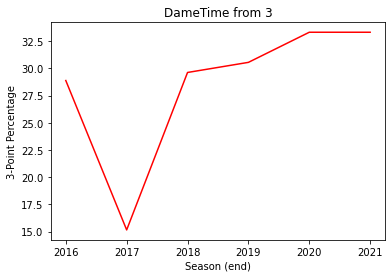

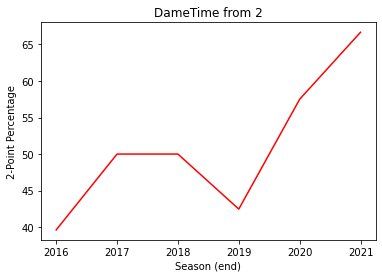

In [43]:
#creating line chart for Damian Lillard 

#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]

plt.plot(season, dame3_list, color = "red")
plt.title('DameTime from 3')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()
    
#creating line chart for 2-pt
plt.plot(season, dame2_list, color = "red")
plt.title('DameTime from 2')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()

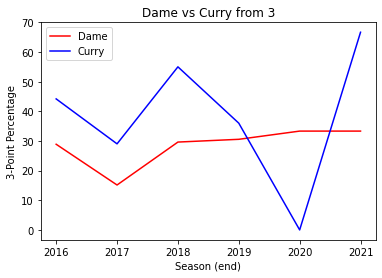

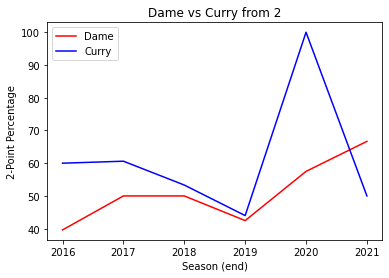

In [20]:
#creating line chart that compares Damian Lillard and Steph Curry

#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]

plt.plot(season, dame3_list, color = "red", label = "Dame")
plt.plot(season, curry3_list, color = "blue", label = "Curry")
plt.legend(loc = "upper left")
plt.title('Dame vs Curry from 3')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()
    
#creating line chart for 2-pt
plt.plot(season, dame2_list, color = "red", label = "Dame")
plt.plot(season, curry2_list, color = "blue", label = "Curry")
plt.legend(loc = "upper left")
plt.title('Dame vs Curry from 2')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()

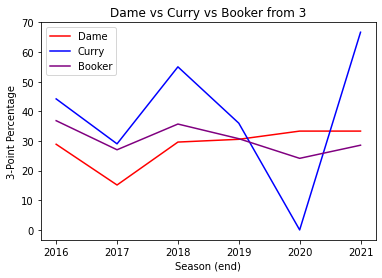

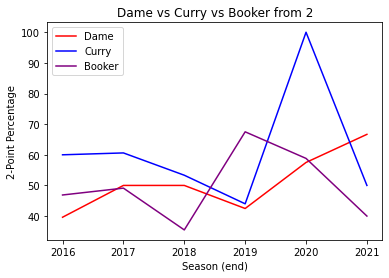

In [22]:
#creating line chart that compares Dame, Curry, and Booker

#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]

plt.plot(season, dame3_list, color = "red", label = "Dame")
plt.plot(season, curry3_list, color = "blue", label = "Curry")
plt.plot(season, booker3_list, color = "purple", label = "Booker")
plt.legend(loc = "upper left")
plt.title('Dame vs Curry vs Booker from 3')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()
    
#creating line chart for 2-pt
plt.plot(season, dame2_list, color = "red", label = "Dame")
plt.plot(season, curry2_list, color = "blue", label = "Curry")
plt.plot(season, booker2_list, color = "purple", label = "Booker")
plt.legend(loc = "upper left")
plt.title('Dame vs Curry vs Booker from 2')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()